# 1D Van der Waals Representation
This notebook demonstrates a 1D representation of Van der Waals surface using Gaussian densities.

## Parameters and Setup
Here we set up the grid points and define the positions and van der Waals radii of the atoms.

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Gaussian representation
x = np.linspace(-10, 10, 500)  # 1D grid points
atom_positions = [-5, 0, 5]  # Example positions of atoms
vdw_radii = [2, 1.5, 2.5]  # Example van der Waals radii
scale_factor = 1.2  # Scale factor for radii


## Distance Calculation
We calculate the distance from each grid point to the center of the atoms using the formula:

$$ d = \left| x - x_{\text{atom}} \right| $$

$$ d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2} $$

이 수식은 `np.linalg.norm(grid_points - pos, axis=1)`을 통해 구현됩니다.  
여기서 `grid_points`는 3D 격자의 점이고, `pos`는 원자의 좌표입니다.

In [2]:

# Generate Gaussian densities for each atom
density = np.zeros_like(x)
for pos, radius in zip(atom_positions, vdw_radii):
    scaled_radius = radius * scale_factor
    density += np.exp(-((x - pos) / scaled_radius) ** 2)


## Gaussian Representation of Atomic Contributions
The contribution of each atom is represented using a Gaussian function:

$$ \rho(x) = \exp\left(-\left(\frac{d}{r}\right)^2\right) $$

where:
- \( d \): Distance from the atom's center
- \( r \): Scaled van der Waals radius

\
이 수식은 `density += np.exp(-((distances / radius) ** 2))`에서 구현됩니다. 각 원자가 기여하는 밀도를 격자에 누적합니다.


## Visualization
We visualize the individual Gaussian densities and the combined density.

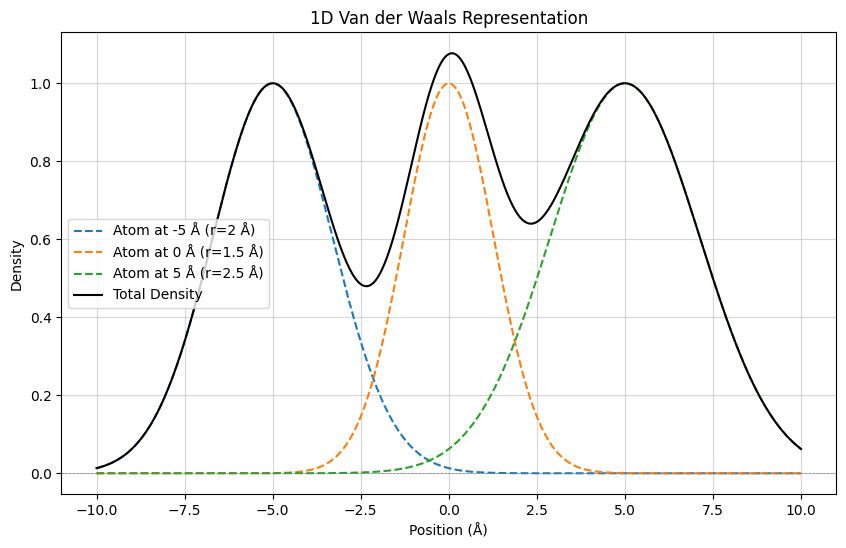

In [3]:

# Plot the 1D representation
plt.figure(figsize=(10, 6))
for pos, radius in zip(atom_positions, vdw_radii):
    scaled_radius = radius * scale_factor
    plt.plot(x, np.exp(-((x - pos) / scaled_radius) ** 2), '--', label=f'Atom at {pos} Å (r={radius} Å)')
plt.plot(x, density, label='Total Density', color='black')

plt.title("1D Van der Waals Representation")
plt.xlabel("Position (Å)")
plt.ylabel("Density")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.grid(alpha=0.5)
plt.show()


## Lennard-Jones Potential vs Gaussian Approximation

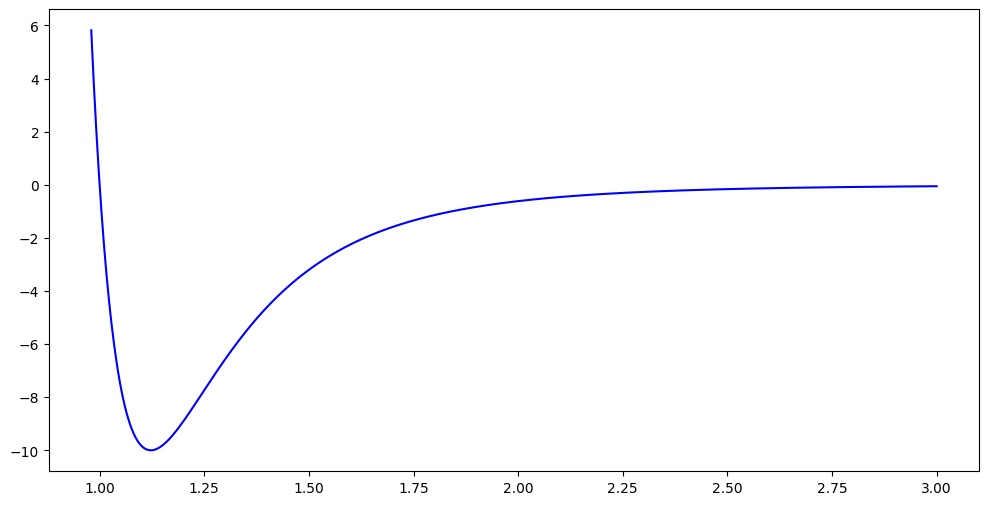

In [25]:
# Parameters for the 1D representation
x = np.linspace(0.98, 3, 1001)

sigma = 1.0  # Characteristic distance for Lennard-Jones potential
epsilon = 10.0  # Depth of potential well
# Lennard-Jones potential
lj_potential = 4 * epsilon * ((sigma / x) ** 12 - (sigma / x) ** 6)

plt.figure(figsize=(12, 6))
plt.plot(x, lj_potential, label="Lennard-Jones Potential", color="blue")

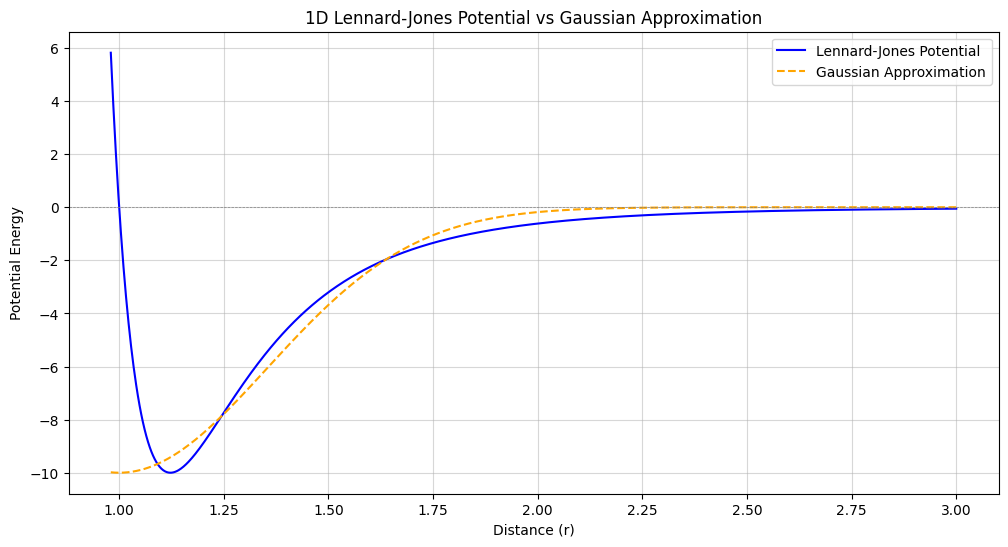

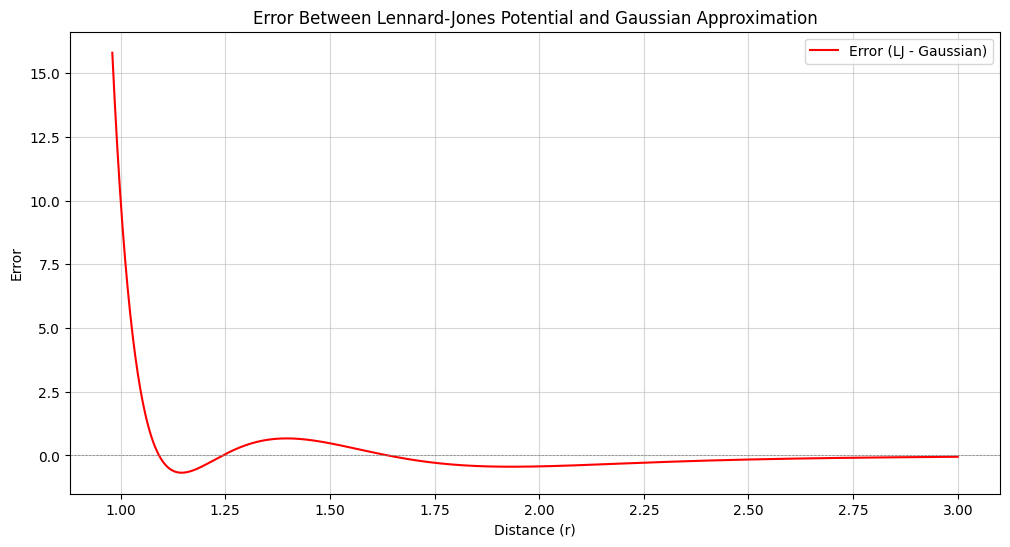

In [26]:
# Gaussian approximation of Lennard-Jones potential
# Match Gaussian to the minimum of the Lennard-Jones potential
gaussian_approx = -epsilon * np.exp(-(((x - sigma) / (sigma / 2)) ** 2))

# Error calculation
error = lj_potential - gaussian_approx

# Plot Lennard-Jones potential and Gaussian approximation
plt.figure(figsize=(12, 6))
plt.plot(x, lj_potential, label="Lennard-Jones Potential", color="blue")
plt.plot(
    x, gaussian_approx, label="Gaussian Approximation", color="orange", linestyle="--"
)
plt.axhline(0, color="gray", linestyle="--", linewidth=0.5)
plt.title("1D Lennard-Jones Potential vs Gaussian Approximation")
plt.xlabel("Distance (r)")
plt.ylabel("Potential Energy")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

# Plot error
plt.figure(figsize=(12, 6))
plt.plot(x, error, label="Error (LJ - Gaussian)", color="red")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.5)
plt.title("Error Between Lennard-Jones Potential and Gaussian Approximation")
plt.xlabel("Distance (r)")
plt.ylabel("Error")
plt.legend()
plt.grid(alpha=0.5)
plt.show()